# Explore here

In [30]:
# Your code here

import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", delimiter=';')
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
# Exploración y limpieza de datos

# Obtener las dimensiones

total_data.shape

(41188, 21)

In [32]:
# Obtener información sobre tipos de datos y valores no nulos

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [33]:
# Buscar duplicados

total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
# Buscar valores nulos 

total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [35]:
# Escalado de valores 

from sklearn.preprocessing import MinMaxScaler

total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]

num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n", "y_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

scaler = MinMaxScaler()

transformed_data = scaler.fit_transform(total_data[num_variables])
df_scaler = pd.DataFrame(transformed_data, index=total_data.index, columns=num_variables)
df_scaler.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [36]:
# Selección de características

# División train vs test 

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest

X = df_scaler.drop("y_n", axis = 1)
y = df_scaler["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980503,1.000000
1,0.0,0.0,1.000000,0.958966,1.000000
2,0.0,0.0,1.000000,0.981410,1.000000
3,0.0,0.0,0.937500,0.958059,0.859735
4,0.0,0.0,0.333333,0.148946,0.512287


In [37]:
X_test_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.000000,0.104167,0.143278,0.425709
1,0.5,0.142857,0.333333,0.150759,0.512287
2,0.0,0.000000,0.479167,0.073679,0.000000
3,0.5,0.142857,0.333333,0.150759,0.512287
4,0.0,0.000000,1.000000,0.981410,1.000000


In [38]:
# Guardado de data limpia

X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [39]:
# Regresion Logistica

# Paso 1: lectura del conjunto de datos procesado 

train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,1.000000,0.980503,1.000000,0.0
1,0.0,0.0,1.000000,0.958966,1.000000,0.0
2,0.0,0.0,1.000000,0.981410,1.000000,0.0
3,0.0,0.0,0.937500,0.958059,0.859735,0.0
4,0.0,0.0,0.333333,0.148946,0.512287,0.0


In [40]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [41]:
# Paso 2: inicializacion y entrenamiento del modelo

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Paso 3: predicción del modelo 

y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8886595434677028

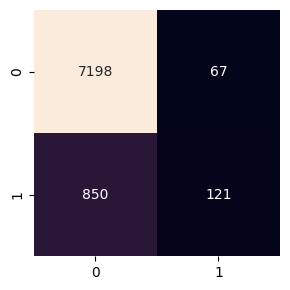

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_marketing_cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(bank_marketing_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [47]:
# Optimización 

# Busqueda en malla

from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la grid

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [48]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [52]:
model_grid = LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg')
model_grid.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [53]:
y_pred = model_grid.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8901165614375911

In [55]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-newton-cg_42.sav", "wb"))